In [12]:
import numpy as np
import matplotlib.pyplot as plt
class KMeans:
    def __init__(self, k=2, max_iters=100, tol=1e-4):
        self.k = k
        self.max_iters = max_iters
        self.tol = tol  # tolerance to stop when centroids stop changing
        self.centroids = None
        self.labels = None

    def fit(self, X):
        # Step 1: Randomly pick k points as initial centroids
        np.random.seed(42)
        indices = np.random.choice(len(X), self.k, replace=False)
        self.centroids = X[indices]

        for i in range(self.max_iters):
            # Step 2: Assign each point to the closest centroid
            distances = self._compute_distances(X)
            self.labels = np.argmin(distances, axis=1)

            # Step 3: Calculate new centroids
            new_centroids = np.array([X[self.labels == j].mean(axis=0) for j in range(self.k)])

            # Step 4: Check for convergence (small centroid movement)
            if np.all(np.linalg.norm(self.centroids - new_centroids, axis=1) < self.tol):
                break

            self.centroids = new_centroids

    def _compute_distances(self, X):
        # Compute the Euclidean distance from each point to each centroid
        return np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)

    def predict(self, X):
        # Assign new points to nearest centroid
        X = np.array(X)
        distances = self._compute_distances(X)
        return np.argmin(distances, axis=1)

Centroids: [[ 5.7   7.7 ]
 [ 8.98 10.64]
 [ 1.16  1.44]]
Labels: [2 2 2 2 2 0 0 0 0 0 1 1 1 1 1]
New point cluster: [2]


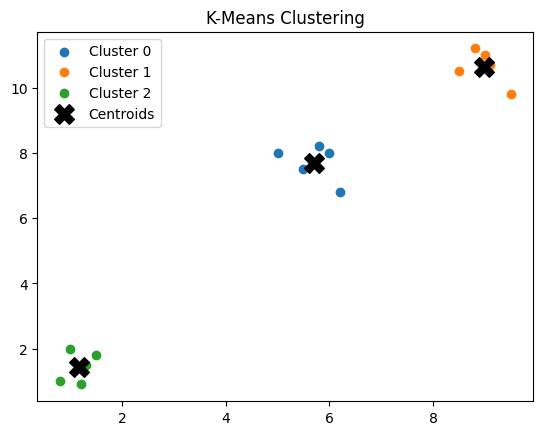

In [15]:
X = np.array([
    # Cluster A
    [1.0, 2.0],
    [1.5, 1.8],
    [1.2, 0.9],
    [0.8, 1.0],
    [1.3, 1.5],
    
    # Cluster B
    [5.0, 8.0],
    [6.0, 8.0],
    [5.5, 7.5],
    [6.2, 6.8],
    [5.8, 8.2],
    
    # Cluster C
    [9.0, 11.0],
    [8.5, 10.5],
    [9.5, 9.8],
    [8.8, 11.2],
    [9.1, 10.7]
])

kmeans = KMeans(k=3)
kmeans.fit(X)

print("Centroids:", kmeans.centroids)
print("Labels:", kmeans.labels)

# Predict new data point
print("New point cluster:", kmeans.predict([[0.9, 2.0]]))

for i in range(kmeans.k):
    cluster_points = X[kmeans.labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {i}")
    
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c='black', marker='X', s=200, label="Centroids")
plt.legend()
plt.title("K-Means Clustering")
plt.show()
